# Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\chris\Desktop\Career Foundry\Instacart 2023'

In [3]:
df_instacart_act = pd.read_pickle(r'C:\Users\chris\Desktop\Career Foundry\Instacart 2023\Data\Prepared Data\df_instacart_activity.pkl')

In [4]:
df_dep = pd.read_csv(r'C:\Users\chris\Desktop\Career Foundry\Instacart 2023\Data\Original Data\departments.csv')

In [7]:
# merging department csv with main data frame
df_Merged = df_dep.merge(df_instacart_act, on = 'department_id')

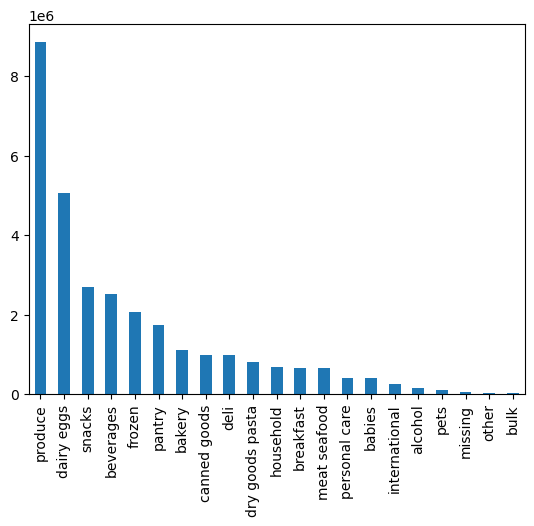

In [9]:
# creating bar chart for department frequency
bar_dep = df_Merged['department'].value_counts().plot.bar()

In [11]:
#saving figure
bar_dep.figure.savefig(os.path.join(path, 'Analysis', 'bar_dep.png'))

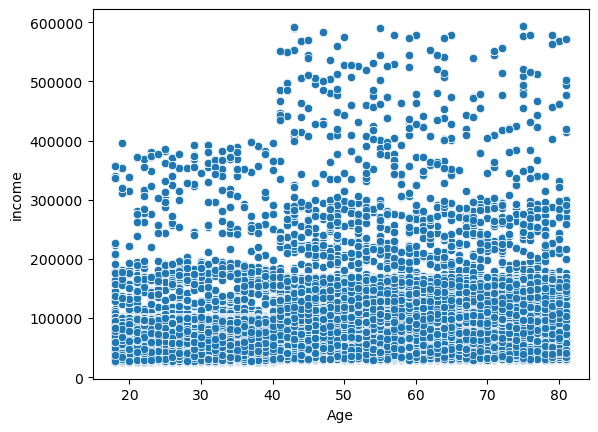

In [12]:
#creating scatterplot between age and income
df_profile_income = sns.scatterplot(x = 'Age', y = 'income', data = df_Merged)

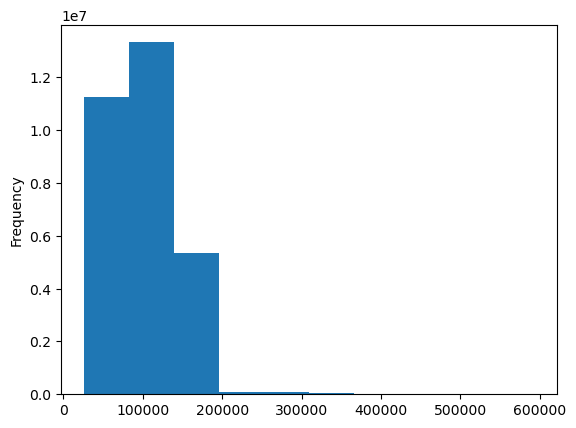

In [14]:
df_income_breakdown = df_Merged['income'].plot.hist(bins = 10)

In [15]:
#creating income profile
df_Merged.loc[df_Merged['income'] > 199000, 'Income_Profile'] = 'High income'

In [16]:
df_Merged.loc[(df_Merged['income'] <199000) & (df_Merged['income'] >100000), 'Income_Profile'] = 'Middle Income'

In [17]:
df_Merged.loc[df_Merged['income'] < 100000, 'Income_Profile'] = 'Low Income'

In [18]:
df_Merged['Income_Profile'].value_counts()

Low Income       16323061
Middle Income    13624547
High income        250848
Name: Income_Profile, dtype: int64

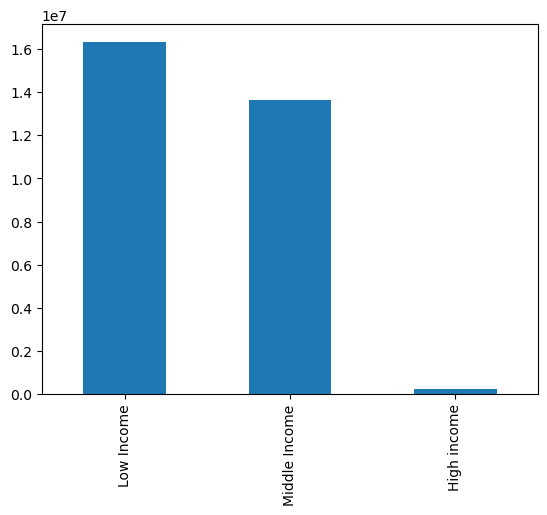

In [40]:
#creating bar chart for income profile
df_inc_prof = df_Merged['Income_Profile'].value_counts().plot.bar()

In [41]:
df_inc_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_inc_prof.png'))

In [19]:
#creating number of dependants profile
result = []
for value in df_Merged['n_dependants']:
    if value == 0:
        result.append('No Dependants')
    elif value == 1:
        result.append('1-2 Dependants')
    elif value == 2:
        result.append('1-2 Dependants')
    else: 
        result.append('3 Dependants')

In [20]:
#creating column for dependant profile
df_Merged['Dependant Profile'] = result

In [21]:
df_Merged['Dependant Profile'].value_counts(dropna = False)

1-2 Dependants    15068877
3 Dependants       7583567
No Dependants      7546387
Name: Dependant Profile, dtype: int64

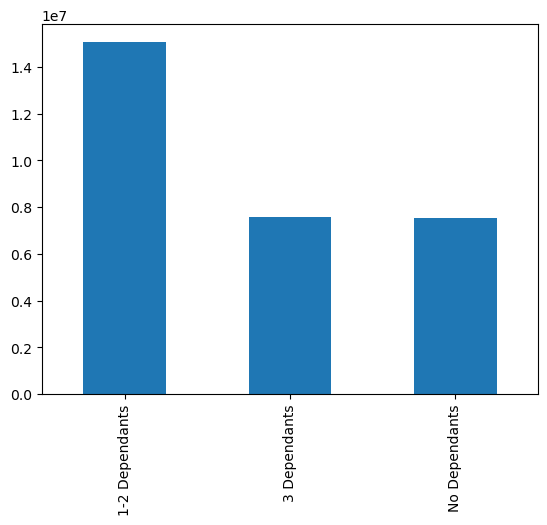

In [42]:
#creating bar chart for dependant profile
df_dep_prof = df_Merged['Dependant Profile'].value_counts().plot.bar()

In [44]:
df_dep_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_dep_prof.png'))

In [22]:
df_Merged.describe()

department_id       user_id           Age  n_dependants        income  \
count   3.019883e+07  3.019883e+07  3.019883e+07  3.019883e+07  3.019883e+07   
mean    9.926147e+00  1.029157e+05  4.947073e+01  1.501983e+00  9.976761e+04   
std     6.282723e+00  5.945335e+04  1.848763e+01  1.118936e+00  4.318078e+04   
min     1.000000e+00  1.000000e+00  1.800000e+01  0.000000e+00  2.590300e+04   
25%     4.000000e+00  5.143200e+04  3.300000e+01  1.000000e+00  6.741900e+04   
50%     9.000000e+00  1.025730e+05  4.900000e+01  2.000000e+00  9.682000e+04   
75%     1.600000e+01  1.543430e+05  6.500000e+01  3.000000e+00  1.281500e+05   
max     2.100000e+01  2.062090e+05  8.100000e+01  3.000000e+00  5.939010e+05   

           order_id  order_number  orders_day_of_week  order_hour_of_day  \
count  3.019883e+07  3.019883e+07        3.019883e+07       3.019883e+07   
mean   1.710158e+06  1.822335e+01        2.742319e+00       1.340344e+01   
std    9.873706e+05  1.769609e+01        2.088380e+00       4.249654e+00   
min    2.000000e+00  1.000000e+00        0.000000e+00       0.000000e+00   
25%    8.552950e+05  6.000000e+00        1.000000e+00       1.000000e+01   
50%    1.710082e+06  1.200000e+01        3.000000e+00       1.300000e+01   
75%    2.565064e+06  2.500000e+01        5.000000e+00       1.600000e+01   
max    3.421083e+06  9.900000e+01        6.000000e+00       2.300000e+01   

       days_since_prior_order    product_id  add_to_cart_order     reordered  \
count            2.869452e+07  3.019883e+07       3.019883e+07  3.019883e+07   
mean             1.063371e+01  2.557698e+04       8.363370e+00  6.140826e-01   
std              8.455045e+00  1.409146e+04       7.136105e+00  4.868112e-01   
min              0.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%              5.000000e+00  1.353500e+04       3.000000e+00  0.000000e+00   
50%              7.000000e+00  2.524600e+04       6.000000e+00  1.000000e+00   
75%              1.400000e+01  3.792300e+04       1.100000e+01  1.000000e+00   
max              3.000000e+01  4.968800e+04       1.450000e+02  1.000000e+00   

           aisle_id        prices     max_order    prices_mean  \
count  3.019883e+07  3.019883e+07  3.019883e+07  194390.000000   
mean   7.120496e+01  1.185904e+01  3.519914e+01      12.569352   
std    3.821917e+01  4.841289e+02  2.475188e+01     126.924999   
min    1.000000e+00  1.000000e+00  6.000000e+00       1.000000   
25%    3.100000e+01  4.200000e+00  1.500000e+01       7.232600   
50%    8.300000e+01  7.400000e+00  2.900000e+01       7.805844   
75%    1.070000e+02  1.130000e+01  4.900000e+01       8.355556   
max    1.340000e+02  9.999900e+04  9.900000e+01   25005.425000   

       Order_frequency  
count    194390.000000  
mean         15.087620  
std           9.071651  
min           0.000000  
25%           7.000000  
50%          13.000000  
75%          22.000000  
max          30.000000

In [30]:
# creating age profile
df_Merged.loc[df_Merged['Age'] > 64, 'Age Profile'] = 'Senior Citizen'

In [31]:
df_Merged.loc[(df_Merged['Age'] <65) & (df_Merged['Age'] >33), 'Age Profile'] = 'Middle Age'

In [34]:
df_Merged.loc[df_Merged['Age'] < 34, 'Age Profile'] = 'Young Adult'

In [35]:
df_Merged['Age Profile'].value_counts(dropna = False)

Middle Age        14636942
Senior Citizen     7996741
Young Adult        7565148
Name: Age Profile, dtype: int64

In [46]:
df_age_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_age_prof.png'))

In [36]:
#creating pet owner profile
result = []
for value in df_Merged['department']:
    if value == 'pets':
        result.append('Pet Owner')
    else: 
        result.append('Non Pet Owner')

In [47]:
#creating column for pet profile
df_Merged['Pet Profile'] = result

In [48]:
df_Merged['Pet Profile'].value_counts(dropna = False)

Non Pet Owner    30108487
Pet Owner           90344
Name: Pet Profile, dtype: int64

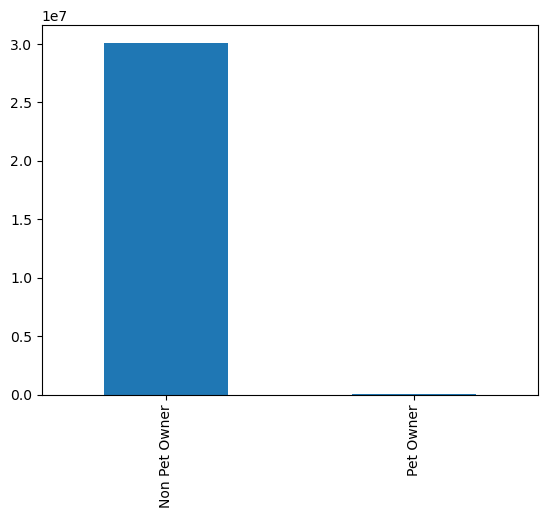

In [49]:
#creating bar chart for age profile
df_pet_prof = df_Merged['Pet Profile'].value_counts().plot.bar()

In [50]:
df_pet_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_pet_prof.png'))

In [51]:
#creating new parent profile
result = []
for value in df_Merged['department']:
    if value == 'babies':
        result.append('New Parent')
    else: 
        result.append('Non New Parent')

In [52]:
#creating column for parent profile
df_Merged['Parent Profile'] = result

In [53]:
df_Merged['Parent Profile'].value_counts(dropna = False)

Non New Parent    29795765
New Parent          403066
Name: Parent Profile, dtype: int64

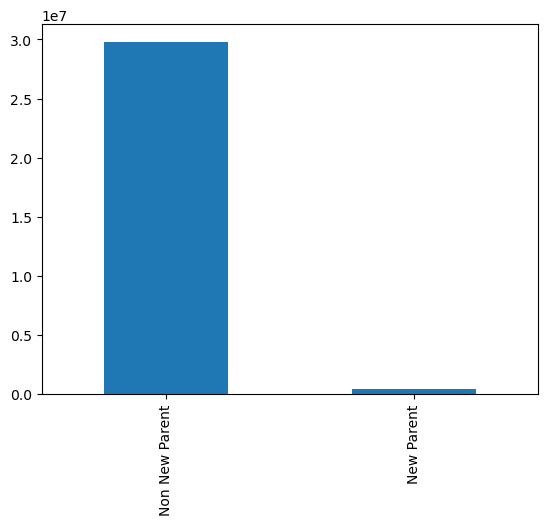

In [55]:
#creating bar chart for parent profile
df_parent_prof = df_Merged['Parent Profile'].value_counts().plot.bar()

In [56]:
df_parent_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_parent_prof.png'))

In [57]:
#creating alcohol purchase profile
result = []
for value in df_Merged['department']:
    if value == 'alcohol':
        result.append('Alcohol')
    else: 
        result.append('Non Alcohol')

In [58]:
#creating column for aclohol profile
df_Merged['Alcohol Profile'] = result

In [59]:
df_Merged['Alcohol Profile'].value_counts(dropna = False)

Non Alcohol    30059213
Alcohol          139618
Name: Alcohol Profile, dtype: int64

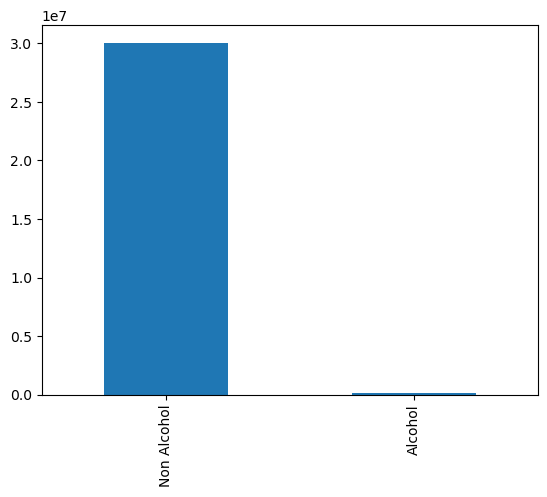

In [60]:
#creating bar chart for alcohol profile
df_alc_prof = df_Merged['Alcohol Profile'].value_counts().plot.bar()

In [61]:
df_alc_prof.figure.savefig(os.path.join(path, 'Analysis', 'df_alc_prof.png'))

In [62]:
df_Merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_Merged.pkl'))